In [1]:
#build image classification model
#  - image classification is the task of taking an image and outputting a class 
#    that best describe the image -dropout-pooling

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten,Dense,Conv2D,Dropout,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

D:\anaconda navigator\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# loading and preprocessing of dataset
mnist=tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
print(xtrain.shape)

(60000, 28, 28)


In [6]:
input_shape=(28,28,1) # channel 1==> images are preseneted in the form of grayscale

In [7]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)

In [8]:
print(xtrain.dtype)

uint8


In [9]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [10]:
print(xtrain.dtype)

float32


In [11]:
xtrain=xtrain/255
xtest=xtest/255

In [12]:
print(xtrain.shape)

(60000, 28, 28, 1)


In [13]:
print(xtest.shape)

(10000, 28, 28, 1)


In [14]:
#defining model architecture


In [15]:
# model=Sequential()
# model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(200,activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(10,activation="softmax"))

In [16]:
model=Sequential([
    Conv2D(28,kernel_size=(3,3),input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(200,activation="relu"),
    Dropout(0.3),
    Dense(10,activation="softmax")
])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 200)               946600    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                      

In [17]:
#traing the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2033 - accuracy: 0.9389
Epoch 2/2
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0841 - accuracy: 0.9739


In [51]:
#Estimating model performance

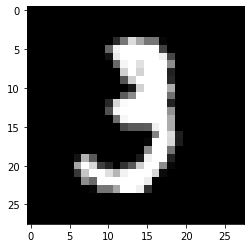

In [24]:
image=xtrain[10]
plt.imshow(np.squeeze(image),cmap='gray')  #remove single dimensional entries from array
plt.show()

In [25]:
image=image.reshape(1,input_shape[0],input_shape[1],input_shape[2])
predict_model=model.predict([image])
print("predicted class : {}".format(np.argmax(predict_model)))

1/1 [==============================] - 0s 40ms/step
predicted class : 3


In [52]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("LOSS :- %.2f"%test_loss)
print("ACCURACY :- %.2f"%test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0728 - accuracy: 0.9843
LOSS :- 0.07
ACCURACY :- 0.98
